In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [12]:
train_df = pd.read_csv('/pio/scratch/1/i313924/data/train_data/train_slim_data.csv',
                 names=['asin', 'reviewerID', 'overall', 'unixReviewTime'])
train_df = train_df.rename(columns={"reviewerID": "u_id", "asin": "i_id", "overall": "rating"})
test_df = pd.read_csv('/pio/scratch/1/i313924/data/test_data/test_slim_data.csv',
                 names=['asin', 'reviewerID', 'overall', 'unixReviewTime'])
test_df = test_df.rename(columns={"reviewerID": "u_id", "asin": "i_id", "overall": "rating"})

In [13]:
model = pd.read_pickle('/pio/scratch/1/i313924/data/svd_data/model_1000_epochs_regularized_train_df.pkl')

In [14]:
pred = model.predict(train_df)
mae = mean_absolute_error(train_df['rating'], pred)
print(mae)
mse = mean_squared_error(train_df['rating'], pred)
print(mse)

0.030797921801240514
0.005058867805624069


In [15]:
pred = model.predict(test_df)
mae = mean_absolute_error(test_df['rating'], pred)
print(mae)
mse = mean_squared_error(test_df['rating'], pred)
print(mse)

0.64290879852753
0.9341231371145755


In [16]:
item_mapping = {v: k for k, v in model.item_mapping_.items()}
items_embeddings = pd.DataFrame(model.qi_)
items_embeddings = items_embeddings.rename(index=item_mapping)

## Embeddings PCA

In [17]:
item_embeddings = pd.DataFrame(model.qi_)
user_embeddings = pd.DataFrame(model.pu_)

In [18]:
item_embeddings 

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.044619,0.350105,-0.009768,-0.136801,-0.025620,-0.037483,0.032896,-0.142519,0.051465,0.162867,...,-0.168885,0.112232,0.053053,0.087331,0.009222,-0.091953,-0.228505,-0.120626,-0.207369,0.044703
1,-0.384322,0.179653,0.008540,-0.034490,-0.223214,-0.136739,-0.250902,-0.040470,-0.056961,0.169395,...,0.052071,0.083905,0.051113,-0.058046,-0.047571,0.120917,0.030797,0.103851,0.175695,-0.194371
2,-0.106051,0.001109,0.076855,-0.117945,0.024760,-0.357427,-0.145592,-0.468028,-0.323752,0.029102,...,-0.062486,0.129644,0.225737,-0.064175,-0.012954,0.231572,-0.234289,-0.030450,-0.209285,0.029777
3,-0.129290,0.153322,-0.337729,0.072576,0.057371,-0.167548,-0.024378,-0.105243,-0.027255,0.174926,...,0.111722,-0.179479,-0.036972,-0.124078,-0.192307,-0.213804,-0.191784,0.024218,0.182840,0.188651
4,-0.022778,-0.122775,-0.073319,0.075659,-0.035768,-0.131033,-0.047429,0.132106,0.045488,-0.223865,...,0.110433,-0.044568,0.052142,0.118059,-0.200899,0.091501,0.018160,0.064085,0.167282,0.030522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166891,0.204144,0.031715,-0.029353,0.022897,-0.041985,0.172902,0.047046,-0.055224,-0.000697,-0.059101,...,0.076901,0.021569,-0.140948,0.139840,-0.117238,0.033792,-0.006420,0.024069,-0.080504,0.026733
166892,0.141404,-0.159764,0.002995,0.237137,-0.142506,-0.123032,-0.038518,0.108034,0.096694,-0.154931,...,-0.177334,0.040304,-0.060091,0.020148,0.021360,0.135165,-0.101282,0.055584,-0.036368,0.129680
166893,-0.133504,0.189979,-0.109118,-0.052692,0.075109,-0.027094,0.037777,-0.022795,-0.089846,0.002068,...,0.042527,0.098356,-0.074036,0.058379,0.136595,0.030840,-0.027566,0.103213,0.271715,0.092899
166894,0.115538,-0.129808,0.052966,-0.122757,-0.006071,0.024412,-0.016149,0.172594,0.023352,-0.087436,...,-0.202812,-0.208787,0.010043,-0.143123,0.141175,0.006336,0.090370,-0.185196,-0.207822,0.113758


In [19]:
embeddings = pd.concat([item_embeddings, user_embeddings], keys=['items', 'users'])

In [20]:
pca = PCA(n_components=2)
pca.fit(embeddings)

PCA(n_components=2)

In [21]:
reduced_item_embeddings = pd.DataFrame(pca.transform(embeddings.loc["items"]))
reduced_user_embeddings = pd.DataFrame(pca.transform(embeddings.loc["users"]))

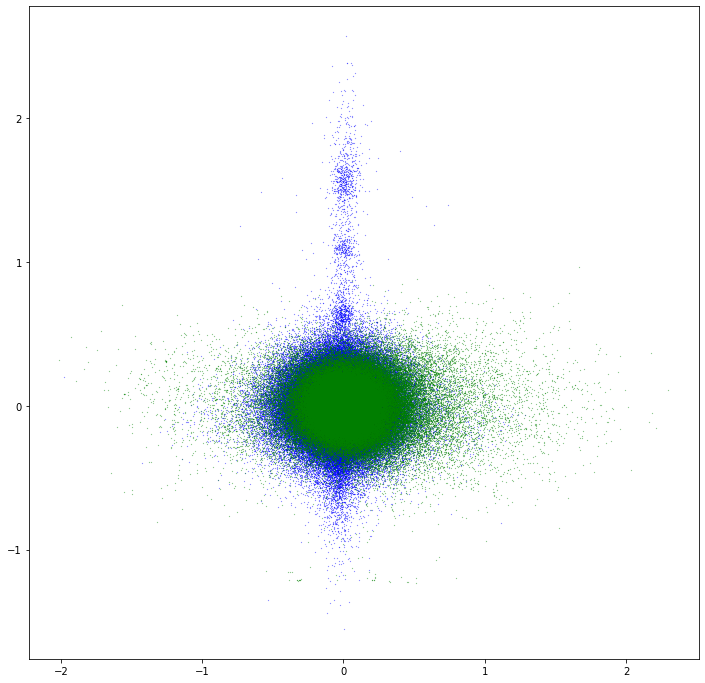

In [22]:
plt.figure(figsize=(12, 12))
plt.scatter(reduced_user_embeddings[0], reduced_user_embeddings[1], c='blue', s=0.03)
plt.scatter(reduced_item_embeddings[0], reduced_item_embeddings[1], c='green', s=0.03)

In [23]:
item_mapping = {v: k for k, v in model.item_mapping_.items()}
user_mapping = {v: k for k, v in model.user_mapping_.items()}

In [24]:
reduced_item_embeddings = reduced_item_embeddings.rename(index=item_mapping)

In [25]:
categories = pd.read_json('/pio/scratch/1/recommender_systems/interim/Amazon/meta_Clothing_Shoes_and_Jewelry_categories.json', lines=True)

In [26]:
reduced_item_embeddings = reduced_item_embeddings.join(categories.set_index('asin'))

In [27]:
reduced_item_embeddings.columns = ['0', '1', 'category_1', 'category_2']

<AxesSubplot:xlabel='0', ylabel='1'>

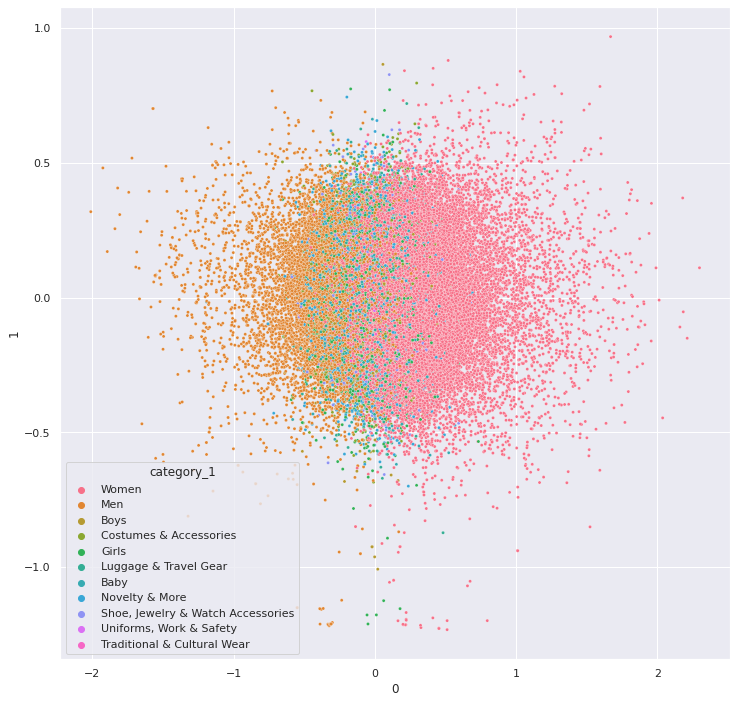

In [28]:
sns.set(rc={'figure.figsize':(12,12)})
sns.scatterplot(x='0', y='1', data=reduced_item_embeddings, hue='category_1', s=10)

<AxesSubplot:xlabel='0', ylabel='1'>

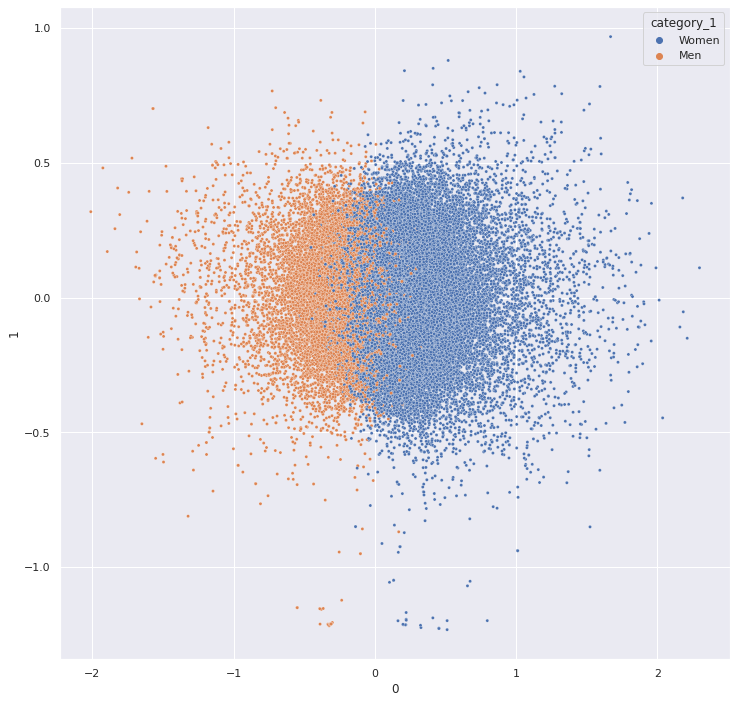

In [29]:
sns.scatterplot(x='0', y='1', data=reduced_item_embeddings[reduced_item_embeddings['category_1'].isin(['Women', 'Men'])], hue='category_1', s=10)